<a href="https://colab.research.google.com/github/Bolshartd/covid_analyse/blob/main/covid_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация за 1 день (28.02.2023)

---



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

### Подготовка данных

---



In [ ]:
# Подгружаем данные по заболевшим
df1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task_15/time_series_covid19_confirmed_global.csv')
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209107,209153,209181,209181,209215,209230,209246,209274,209308,209322
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334314,334315,334336,334336,334345,334356,334373,334378,334380,334391
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271425,271426,271428,271431,271432,271436,271439,271440,271440,271441
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47866,47866,47866,47866,47866
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105184,105184,105184,105205,105205,105205,105205,105205,105255,105255


In [ ]:
# Подгружаем данные по умершим
df2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task_15/time_series_covid19_deaths_global.csv')
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1933,1933


In [ ]:
# Вычисляем данные по заболевшим и умершим за 28.02.2023
date1 = df1[ '2/28/23'] - df1[ '2/27/23']
date2 = df2[ '2/28/23'] - df2[ '2/27/23']
df1['2/28/23'] = date1
df2['2/28/23'] = date2

In [ ]:
# Оставляем только интересующие данные из таблицы
day_1 = df1[['Country/Region', 'Lat', 'Long', '2/28/23']]
day_1.columns = ['Country/Region', 'Lat', 'Long', 'Заболевшие на 28.02.2023']
day_2 = df2[['Country/Region', 'Lat', 'Long', '2/28/23']]
day_2.columns = ['Country/Region', 'Lat', 'Long', 'Умершие на 28.02.2023']
day = pd.merge(day_1, day_2)
day.columns = ['Страна', 'Широта', 'Долгота', 'Заболевшие на 28.02.2023', 'Умершие на 28.02.2023']
day.fillna(0)
day

,Страна,Широта,Долгота,Заболевшие на 28.02.2023,Умершие на 28.02.2023
0,Afghanistan,33.939110,67.709953,14,0
1,Albania,41.153300,20.168300,11,0
2,Algeria,28.033900,1.659600,1,0
3,Andorra,42.506300,1.521800,0,0
4,Angola,-11.202700,17.873900,0,0
...,...,...,...,...,...
286,West Bank and Gaza,31.952200,35.233200,0,0
287,Winter Olympics 2022,39.904200,116.407400,0,0
288,Yemen,15.552727,48.516388,0,0
289,Zambia,-13.133897,27.849332,181,2


###Кластеризация по **заболевшим** 28.02.2023

---



In [ ]:
# Убираем данные со значением  - 0
day_kmean_o = day.drop(np.where(day['Заболевшие на 28.02.2023'] == 0)[0])
day_kmean_o

,Страна,Широта,Долгота,Заболевшие на 28.02.2023,Умершие на 28.02.2023
0,Afghanistan,33.939110,67.709953,14,0
1,Albania,41.153300,20.168300,11,0
2,Algeria,28.033900,1.659600,1,0
17,Austria,47.516200,14.550100,5889,15
18,Azerbaijan,40.143100,47.576900,36,2
...,...,...,...,...,...
264,Ukraine,48.379400,31.165600,93,0
265,United Arab Emirates,23.424076,53.847818,68,0
284,Venezuela,6.423800,-66.589700,7,0
285,Vietnam,14.058324,108.277199,12,0


In [ ]:
# Оставляем только данные по заболевшим
day_kmean_z = day_kmean_o[['Заболевшие на 28.02.2023']]
#day_kmean_z

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
# Масштабируем данные
day_kmean_z = sc.fit_transform(day_kmean_z)
day_kmean_z = pd.DataFrame(day_kmean_z)
#day_kmean_z

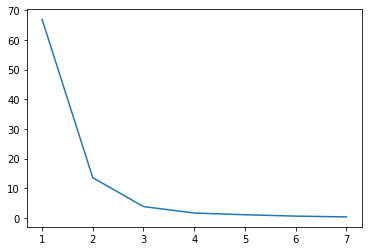

In [ ]:
# Определяем кол-во кластеров по методу 'локтя'
clast_z = []
for i in range(1, 8):
  kmean = KMeans(n_clusters=i)
  kmean.fit(day_kmean_z)
  clast_z.append(kmean.inertia_)
plt.plot(range(1, 8), clast_z)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch

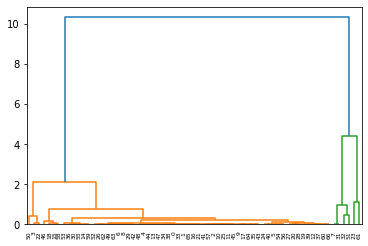

In [ ]:
# Проверим кол-во кластеров на графике с помощью дендрограммы
Z = sch.linkage(day_kmean_z, method='ward')
plt.figure()
dn = sch.dendrogram(Z)
plt.show()

In [ ]:
# Определено 2 кластера
kmean = KMeans(n_clusters=2)
kmean.fit(day_kmean_z)

KMeans(n_clusters=2)

In [ ]:
kmean.predict(day_kmean_z)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0], dtype=int32)

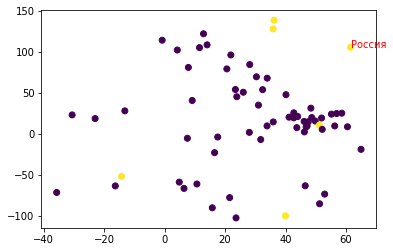

In [ ]:
# Распределение по кластерам (по заболеваемости 28.02.2023) и положение России
plt.scatter(day_kmean_o['Широта'], day_kmean_o['Долгота'], c=kmean.labels_)
plt.text(61.52401, 105.318756, 'Россия', c='red')
plt.show()

In [ ]:
# Координаты данных по России
rus = day_kmean_o.loc[day_kmean_o['Страна'] == 'Russia']
rus

,Страна,Широта,Долгота,Заболевшие на 28.02.2023,Умершие на 28.02.2023
223,Russia,61.52401,105.318756,9660,35


*Вывод: Россия оказалась в кластере с самым большим кол-вом заболевших*

---



---



###Кластеризация по **умершим** 28.02.2023

In [ ]:
# Убираем данные со значением  - 0
day_kmean_d = day.drop(np.where(day['Умершие на 28.02.2023'] == 0)[0])
#day_kmean_d

In [ ]:
# Оставляем только данные по умершим
day_kmean_c = day_kmean_d[['Умершие на 28.02.2023']]
#day_kmean_c

In [ ]:
sc = StandardScaler()

In [ ]:
# Масштабируем данные
day_kmean_c = sc.fit_transform(day_kmean_c)
day_kmean_c = pd.DataFrame(day_kmean_c)
#day_kmean_c

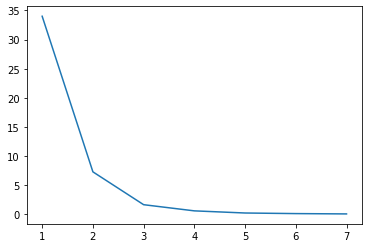

In [ ]:
# Определяем кол-во кластеров по методу 'локтя'
clast_c = []
for i in range(1, 8):
  kmean = KMeans(n_clusters=i)
  kmean.fit(day_kmean_c)
  clast_c.append(kmean.inertia_)
plt.plot(range(1, 8), clast_c)
plt.show()

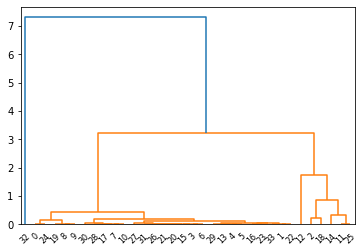

In [ ]:
# Проверим кол-во кластеров на графике с помощью дендрограммы
Z = sch.linkage(day_kmean_c, method='ward')
plt.figure()
dn = sch.dendrogram(Z)
plt.show()

In [ ]:
# Определено 2 кластера
kmean = KMeans(n_clusters=2)
kmean.fit(day_kmean_c)

KMeans(n_clusters=2)

In [ ]:
kmean.predict(day_kmean_c)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

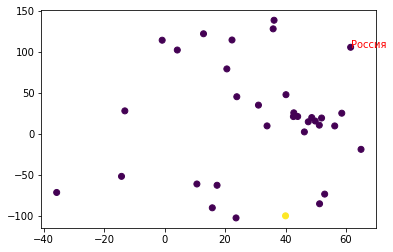

In [ ]:
# Распределение по кластерам (по умершим 28.02.2023) и положение России
plt.scatter(day_kmean_d['Широта'], day_kmean_d['Долгота'], c=kmean.labels_)
plt.text(61.52401, 105.318756, 'Россия', c='red')
plt.show()

*Вывод: Россия оказалась в кластере с 'обычным' числом умерших*

---



---



# Кластеризация за 1 месяц (феврать 2023)

---



### Подготовка данных

In [ ]:
def monthClaster(n):
  if n == 1:
    # Данные по заболевшим
    dfMonth = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task_15/time_series_covid19_confirmed_global.csv')
  else:
    # Данные по умершим
    dfMonth = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task_15/time_series_covid19_deaths_global.csv')
  df = dfMonth.loc[:, '1/31/23':'2/28/23']
  # Вычисляем кол-во заразившихся/умерших в конкретный день
  i = 28
  while True:
    if i == 0:
      break
    elif i > 1:
      data = df[f'2/{i}/23'] - df[f'2/{i-1}/23']
      df[f'2/{i}/23'] = data

    elif i == 1:
      data = df['2/1/23'] - df['1/31/23']
      df[f'2/{i}/23'] = data
    i -= 1
  # Формирование итоговой таблицы
  day = dfMonth[['Lat', 'Long']]
  month = day.join(df)
  month.drop(columns=month.columns [2], axis= 1 , inplace= True )

  return month


months_sick = monthClaster(1)
months_death = monthClaster(2)

###Кластеризация по **заболевшим** за февраль 2023

---



In [ ]:
# Таблица по заболевшим за феврать 2023
months_sickDate = months_sick.loc[:, '2/1/23':'2/28/23']

In [ ]:
months_sickDate = abs(months_sickDate)
#months_sickDate

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [ ]:
sc = StandardScaler()

In [ ]:
month_kmean_z = sc.fit_transform(months_sickDate)
month_kmean_z = pd.DataFrame(month_kmean_z)
month_kmean_z.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.128498,-0.130995,-0.179250,-0.108025,-0.122330,-0.162551,-0.154585,-0.127503,-0.157952,-0.108034,...,-0.149582,-0.150280,-0.140255,-0.124425,-0.171715,-0.181652,-0.120529,-0.139838,-0.154092,-0.164678
1,-0.128121,-0.148982,-0.175774,-0.124529,-0.121925,-0.191705,-0.158528,-0.134175,-0.156717,-0.164780,...,-0.157236,-0.177190,-0.141916,-0.124425,-0.177616,-0.183152,-0.119667,-0.156067,-0.166403,-0.165746
2,-0.128498,-0.150495,-0.177512,-0.124880,-0.124758,-0.191326,-0.157600,-0.135372,-0.157422,-0.164780,...,-0.162156,-0.177190,-0.146426,-0.123985,-0.179504,-0.185777,-0.131727,-0.158890,-0.167172,-0.169305
3,-0.129377,-0.150663,-0.176860,-0.124880,-0.124758,-0.191705,-0.158528,-0.136056,-0.156187,-0.164780,...,-0.162156,-0.177788,-0.146901,-0.124425,-0.179741,-0.187277,-0.134311,-0.159595,-0.167172,-0.169661
4,-0.129377,-0.150663,-0.179250,-0.124880,-0.124758,-0.191705,-0.158528,-0.136056,-0.157952,-0.164780,...,-0.162156,-0.177788,-0.146901,-0.121342,-0.179741,-0.187277,-0.134311,-0.159595,-0.147937,-0.169661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.129377,-0.150663,-0.179250,-0.124880,-0.124758,-0.191705,-0.158528,-0.136056,-0.157952,-0.164780,...,-0.162156,-0.177788,-0.146901,-0.124425,-0.179741,-0.187277,-0.134311,-0.159595,-0.167172,-0.169661
285,-0.129377,-0.150663,-0.179250,-0.124880,-0.124758,-0.191705,-0.158528,-0.136056,-0.157952,-0.164780,...,-0.162156,-0.177788,-0.146901,-0.124425,-0.179741,-0.187277,-0.134311,-0.159595,-0.167172,-0.169661
286,-0.129377,-0.150663,-0.179250,-0.124880,-0.124758,-0.191705,-0.158528,-0.136056,-0.157952,-0.164780,...,-0.162156,-0.177788,-0.146901,-0.124425,-0.179741,-0.187277,-0.134311,-0.159595,-0.167172,-0.169661
287,-0.106650,-0.097373,-0.149701,-0.063078,-0.124758,-0.147406,-0.158528,-0.093976,-0.126545,-0.164780,...,-0.162156,0.065601,-0.133134,-0.117232,-0.179741,-0.187277,-0.134311,-0.159595,-0.167172,-0.105242


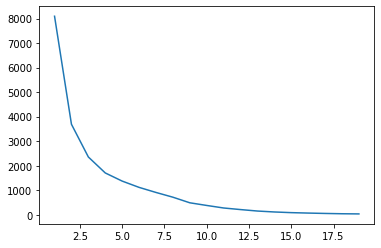

In [ ]:
clast_z = []
for i in range(1, 20):
  kmean = KMeans(n_clusters=i)
  kmean.fit(month_kmean_z)
  clast_z.append(kmean.inertia_)
plt.plot(range(1, 20), clast_z)
plt.show()

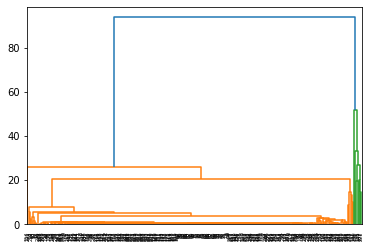

In [ ]:
Z = sch.linkage(month_kmean_z, method='ward')
plt.figure()
dn = sch.dendrogram(Z)
plt.show()

In [ ]:
kmean = KMeans(n_clusters=4)
kmean.fit(month_kmean_z)

KMeans(n_clusters=4)

In [ ]:
kmean.predict(month_kmean_z)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

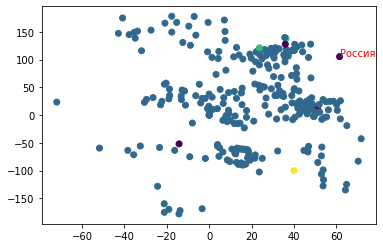

In [ ]:
# Распределение по кластерам (по заболеваемости за февраль 2023) и положение России
plt.scatter(months_sick['Lat'], months_sick['Long'], c=kmean.labels_)
plt.text(61.52401, 105.318756, 'Россия', c='red')
plt.show()

*Вывод: Россия оказалась в кластере с 'одним из самого большого кол-ва заболевших в феврале 2023*

---



---



###Кластеризация по **умершим** за февраль 2023

In [ ]:
# Таблица по умершим за феврать 2023
months_deathDate = months_death.loc[:, '2/1/23':'2/28/23']

In [ ]:
months_deathDate = abs(months_deathDate)
#months_deathDate

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [ ]:
sc = StandardScaler()

In [ ]:
month_kmean_z = sc.fit_transform(months_deathDate)
month_kmean_z = pd.DataFrame(month_kmean_z)
month_kmean_z.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.113182,-0.003418,-0.166738,-0.054101,0.012806,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
1,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.078445,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
2,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
3,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
4,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,0.007057,-0.134051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
285,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
286,-0.113182,-0.125202,-0.166738,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.132621,-0.150672,...,-0.138369,-0.226792,-0.122594,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.134051
287,-0.100721,-0.125202,-0.145464,-0.069638,-0.138257,-0.196608,-0.137123,-0.103515,-0.115818,-0.150672,...,-0.138369,0.118777,-0.077916,-0.115398,-0.140578,-0.163687,-0.151808,-0.16108,-0.178345,-0.044786


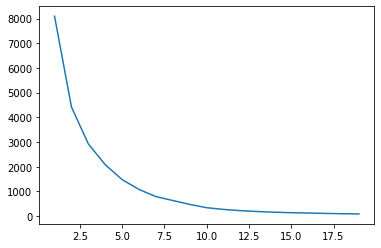

In [ ]:
clast_z = []
for i in range(1, 20):
  kmean = KMeans(n_clusters=i)
  kmean.fit(month_kmean_z)
  clast_z.append(kmean.inertia_)
plt.plot(range(1, 20), clast_z)
plt.show()

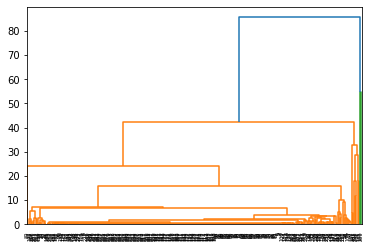

In [ ]:
Z = sch.linkage(month_kmean_z, method='ward')
plt.figure()
dn = sch.dendrogram(Z)
plt.show()

In [ ]:
kmean = KMeans(n_clusters=3)
kmean.fit(month_kmean_z)

KMeans(n_clusters=3)

In [ ]:
kmean.predict(month_kmean_z)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

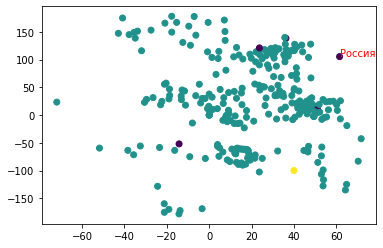

In [ ]:
plt.scatter(months_death['Lat'], months_death['Long'], c=kmean.labels_)
plt.text(61.52401, 105.318756, 'Россия', c='red')
plt.show()

*Вывод: Россия оказалась в кластере с одним из самых больших показателей по смертности в феврале 2023*

---



---



# Кластеризация за 1 год (февраль 2022 - февраль 2023)

---



### Подготовка данных

In [ ]:
def yearClaster(n):
  if n == 1:
    # Данные по заболевшим
    dfYear = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task_15/time_series_covid19_confirmed_global.csv')
  else:
    # Данные по умершим
    dfYear = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task_15/time_series_covid19_deaths_global.csv')
  df = dfYear.loc[:, '2/28/22':'2/28/23']
  # Вычисляем кол-во заразившихся/умерших за год
  data = df['2/28/23'] - df['2/28/22']
  df['Total'] = data

  # Формирование итоговой таблицы
  day = dfYear[['Country/Region', 'Lat', 'Long']]
  month = day.join(df)
  
  return month


year_sick = yearClaster(1)
year_death = yearClaster(2)

In [ ]:
rus = year_death.loc[year_death['Country/Region'] == 'Russia']
rus

,Country/Region,Lat,Long,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,...,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,Total
221,Russia,61.52401,105.318756,344655,345427,346197,346967,347730,348467,349196,...,387861,387899,387932,387969,388000,388033,388063,388091,388126,43471


In [ ]:
year_death['Total'].max()

169543

###Кластеризация по **заболевшим** за 1 год (февраль 2022 - февраль 2023)

---



In [ ]:
# Таблица по заболевшим за 2023
year_sickDate = year_sick[['Total']]
#months_sickDate

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [ ]:
sc = StandardScaler()

In [ ]:
year_kmean_z = sc.fit_transform(year_sickDate)
year_kmean_z = pd.DataFrame(year_kmean_z)
year_kmean_z.fillna(0)

,0
0,-0.232285
1,-0.224271
2,-0.240888
3,-0.239896
4,-0.240886
...,...
284,-0.225907
285,-0.242803
286,-0.242756
287,-0.233879


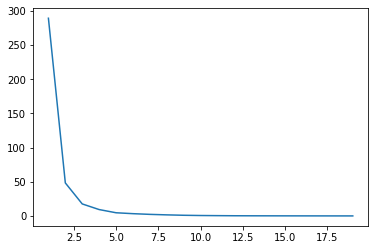

In [ ]:
clast_z = []
for i in range(1, 20):
  kmean = KMeans(n_clusters=i)
  kmean.fit(year_kmean_z)
  clast_z.append(kmean.inertia_)
plt.plot(range(1, 20), clast_z)
plt.show()

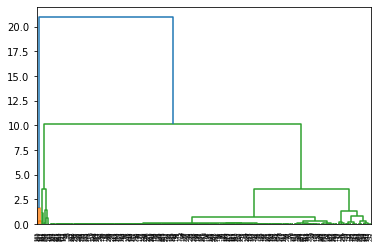

In [ ]:
Z = sch.linkage(year_kmean_z, method='ward')
plt.figure()
dn = sch.dendrogram(Z)
plt.show()

In [ ]:
kmean = KMeans(n_clusters=4)
kmean.fit(year_kmean_z)

KMeans(n_clusters=4)

In [ ]:
kmean.predict(year_kmean_z)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0], dtype=int32)

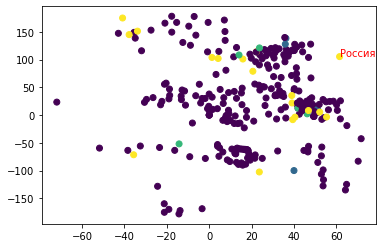

In [ ]:
# Распределение по кластерам (по заболеваемости за февраль 2023) и положение России
plt.scatter(year_sick['Lat'], year_sick['Long'], c=kmean.labels_)
plt.text(61.52401, 105.318756, 'Россия', c='red')
plt.show()

*Вывод: Россия оказалась в кластере со средним кол-вом заболевших в 2023*

---



---



###Кластеризация по **умершим** за 1 год (февраль 2022 - февраль 2023)

In [ ]:
# Таблица по умершим за 2023
year_sickDate = year_death[['Total']]
#months_sickDate

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [ ]:
sc = StandardScaler()

In [ ]:
year_kmean_z = sc.fit_transform(year_sickDate)
year_kmean_z = pd.DataFrame(year_kmean_z)
year_kmean_z.fillna(0)

,0
0,-0.214721
1,-0.227843
2,-0.234288
3,-0.236772
4,-0.235297
...,...
284,-0.221787
285,-0.237859
286,-0.235996
287,-0.229707


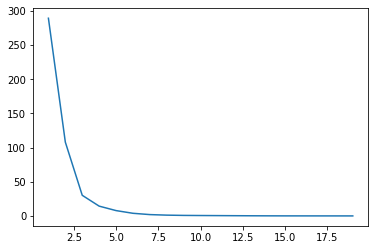

In [ ]:
clast_z = []
for i in range(1, 20):
  kmean = KMeans(n_clusters=i)
  kmean.fit(year_kmean_z)
  clast_z.append(kmean.inertia_)
plt.plot(range(1, 20), clast_z)
plt.show()

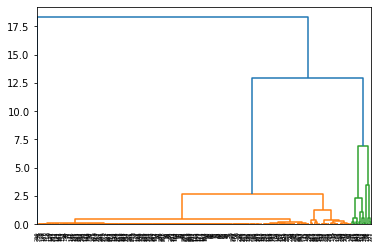

In [ ]:
Z = sch.linkage(year_kmean_z, method='ward')
plt.figure()
dn = sch.dendrogram(Z)
plt.show()

In [ ]:
kmean = KMeans(n_clusters=3)
kmean.fit(year_kmean_z)

KMeans(n_clusters=3)

In [ ]:
kmean.predict(year_kmean_z)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

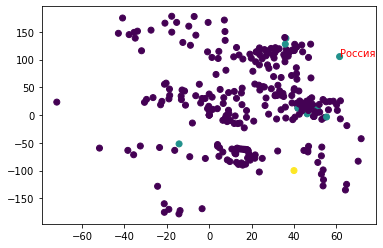

In [ ]:
plt.scatter(year_death['Lat'], year_death['Long'], c=kmean.labels_)
plt.text(61.52401, 105.318756, 'Россия', c='red')
plt.show()

*Вывод: Россия оказалась в кластере с одним из самых больших показателей по смертности в 2023*

---



---

